# Adding Dependences

In [14]:
using DelimitedFiles
using Images, FileIO
using Plots

# Extract Matrix From Image

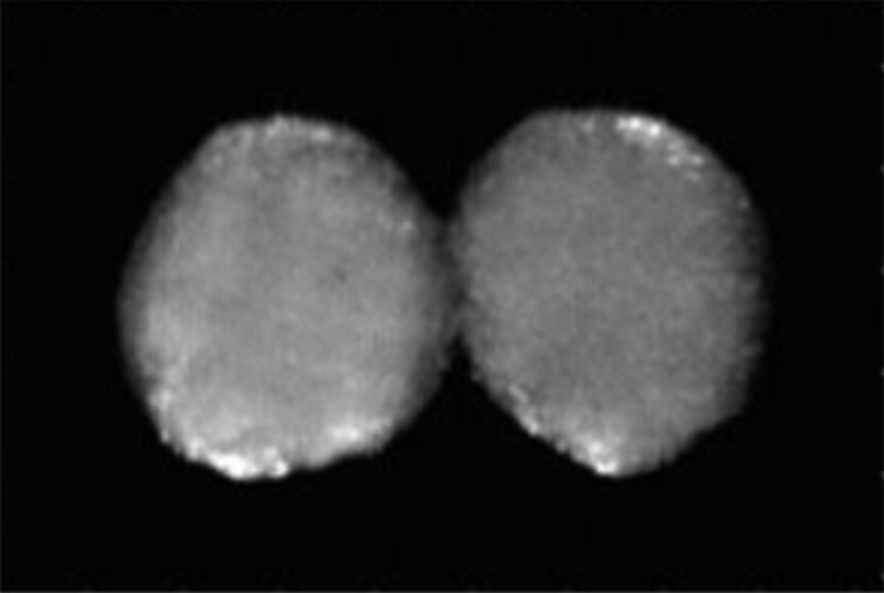

In [15]:
img = load("A.png")

## Extracting the grayscale on the image

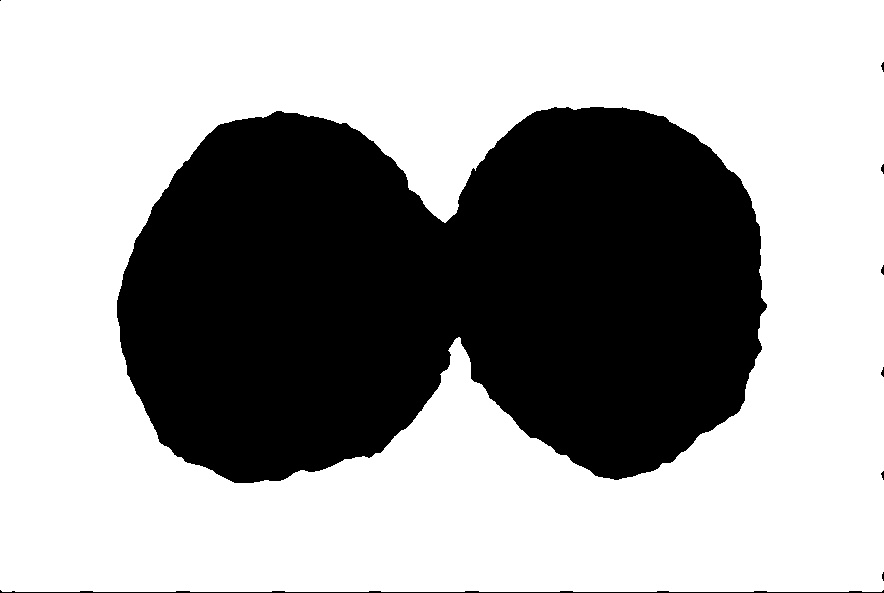

In [16]:
Gray_img = .! (Gray.(img) .> 0.1)
Gray.(Gray_img)

# Extracting the Contour on the image

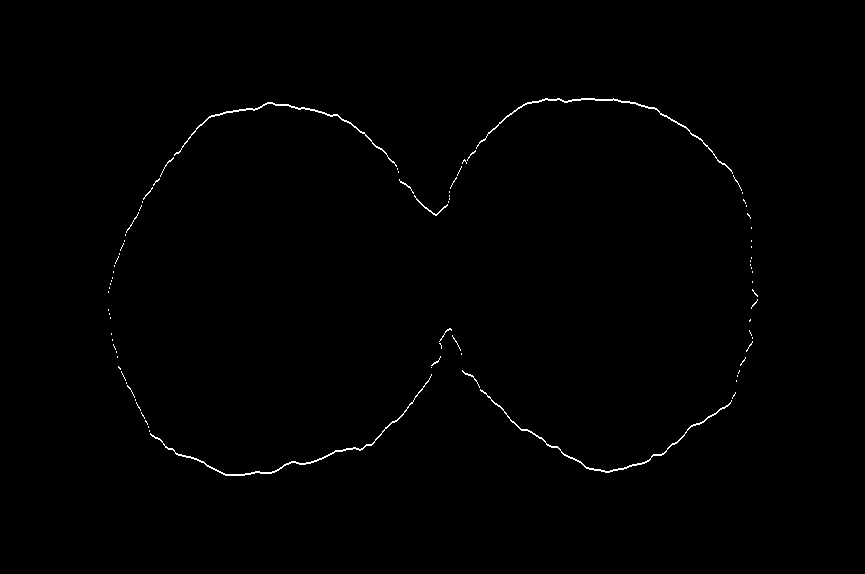

In [17]:
reduce = 10
Gray_img_contour = abs.(Gray_img - circshift(Gray_img,2))
Gray_img_contour = Gray_img_contour[reduce:size(Gray_img_contour)[1]-reduce,reduce:size(Gray_img_contour)[2]-reduce]
Gray.(Gray_img_contour)

# Extracting the index of each point

In [18]:
idx = CartesianIndices(size(Gray_img_contour))[Gray_img_contour .== 1]
arr_idx = hcat(getindex.(idx,2),getindex.(idx,1))

2648×2 Matrix{Int64}:
 109  292
 109  293
 109  310
 109  311
 110  288
 110  289
 110  314
 110  315
 111  284
 111  285
 111  318
 111  319
 112  281
   ⋮  
 756  294
 756  295
 756  303
 756  304
 757  295
 757  296
 757  302
 757  303
 758  296
 758  297
 758  300
 758  301

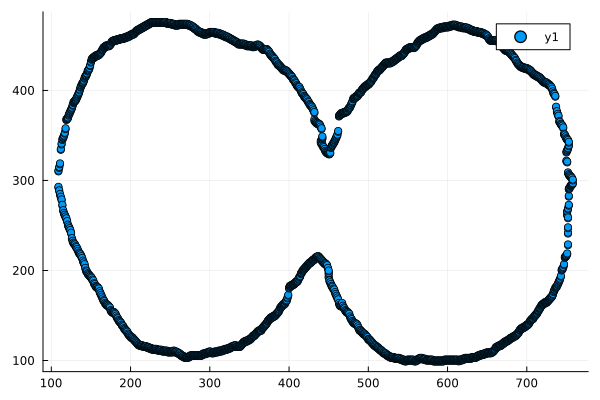

In [19]:
plot(arr_idx[:,1], arr_idx[:,2], seriestype = :scatter)

# Center of Mass

In [20]:
Gray_img

593×884 BitMatrix:
 0  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1 

In [21]:
# In X
sum_x = sum(Gray_img, dims=1) .* collect(1:size(Gray_img,2))'
x_c = sum(sum_x) / sum(Gray_img)

# In Y
sum_y = sum(Gray_img, dims=2) .* collect(1:size(Gray_img,1))
y_c = sum(sum_y) / sum(Gray_img)

center_of_mass = hcat(x_c,y_c)

1×2 Matrix{Float64}:
 441.624  297.823

# Putting the index in the center of mass

In [22]:
center_idx = arr_idx - repeat(center_of_mass, size(arr_idx, 1))

2648×2 Matrix{Float64}:
 -332.624   -5.82312
 -332.624   -4.82312
 -332.624   12.1769
 -332.624   13.1769
 -331.624   -9.82312
 -331.624   -8.82312
 -331.624   16.1769
 -331.624   17.1769
 -330.624  -13.8231
 -330.624  -12.8231
 -330.624   20.1769
 -330.624   21.1769
 -329.624  -16.8231
    ⋮      
  314.376   -3.82312
  314.376   -2.82312
  314.376    5.17688
  314.376    6.17688
  315.376   -2.82312
  315.376   -1.82312
  315.376    4.17688
  315.376    5.17688
  316.376   -1.82312
  316.376   -0.823124
  316.376    2.17688
  316.376    3.17688

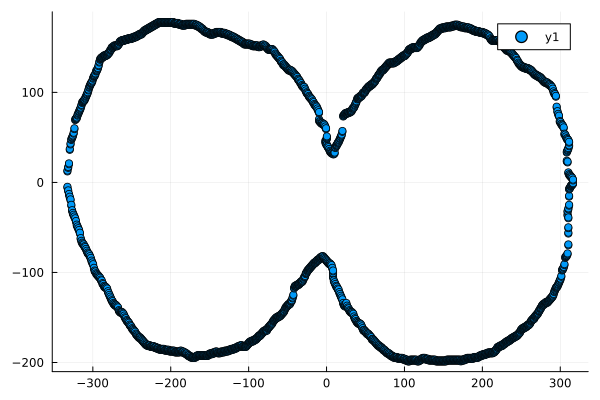

In [23]:
plot(center_idx[:,1], center_idx[:,2], seriestype = :scatter)

## Cilindrical Coordinates

In [24]:
r = sqrt.(sum(center_idx .^ 2, dims=2))
θ = atan.(center_idx[:,2] ./ center_idx[:,1]) + pi*[center_idx[:,2] .< 0][1]
center_idx_cil_coord = hcat(θ,r)

2648×2 Matrix{Float64}:
  3.1591      332.675
  3.15609     332.659
 -0.0365922   332.847
 -0.0395942   332.885
  3.17121     331.769
  3.16819     331.741
 -0.0487422   332.018
 -0.05175     332.068
  3.18338     330.913
  3.18036     330.872
 -0.0609511   331.239
 -0.0639639   331.301
  3.19259     330.053
  ⋮           
  3.12943     314.399
  3.13261     314.389
  0.0164657   314.419
  0.0196455   314.437
  3.13264     315.389
  3.13581     315.381
  0.0132433   315.404
  0.0164135   315.419
  3.13583     316.381
  3.13899     316.377
  0.00688055  316.384
  0.0100411   316.392

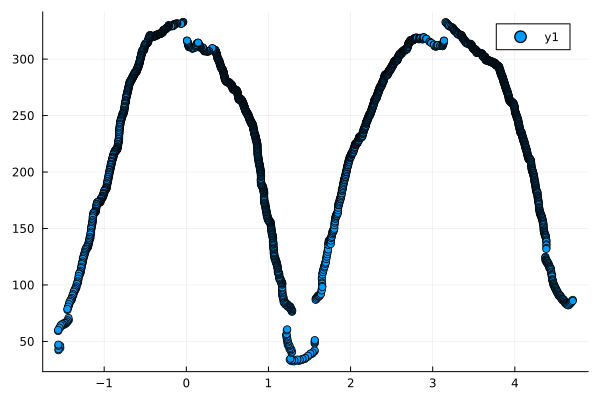

In [25]:
plot(center_idx_cil_coord[:,1], center_idx_cil_coord[:,2], seriestype = :scatter)